In [1]:
import numpy as np
import scipy
from scipy import stats
from typing import List
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import Image
import math
import random

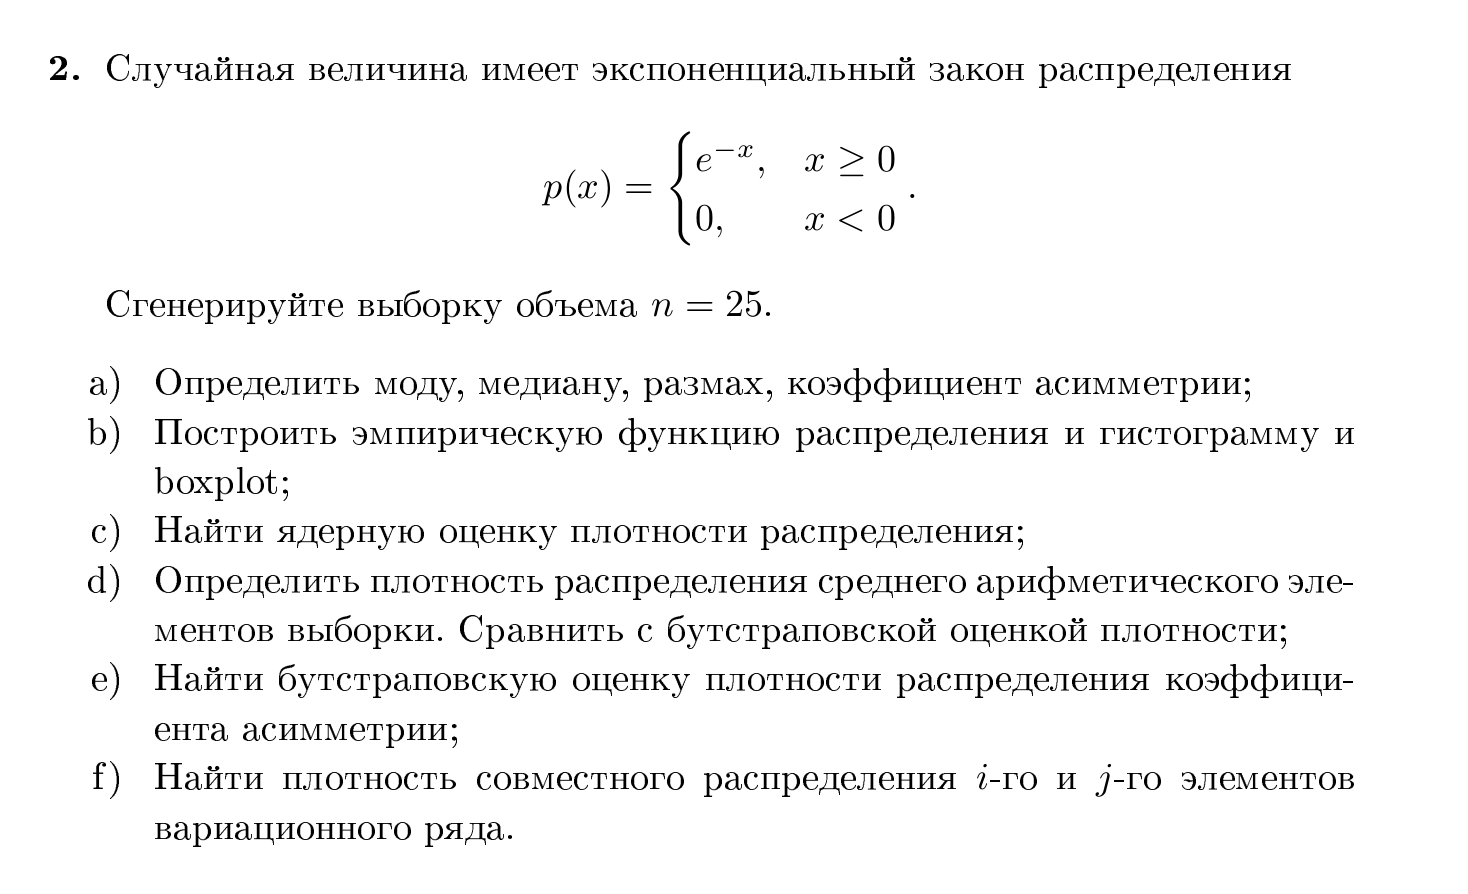

In [2]:
Image(filename="pics/t2.png", width = 950)

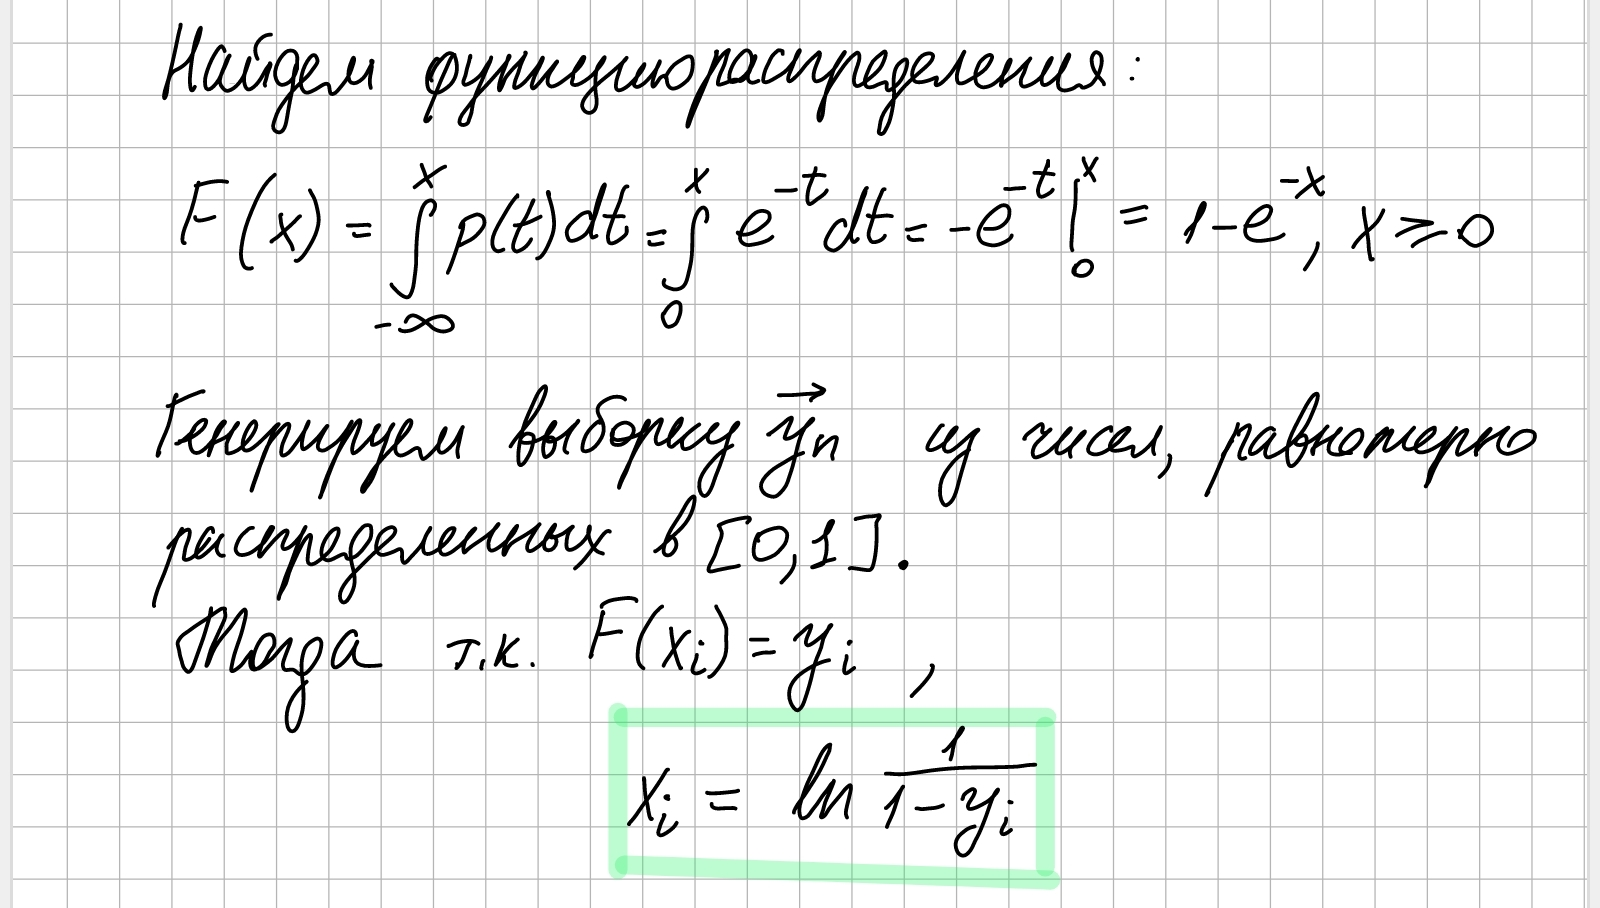

In [3]:
Image(filename="pics/t2p1.jpg", width = 950)

In [4]:
def x(y):
    if y > 1:
        raise ValueError("error :c")
    return -np.log(1 - y)

n = 25 
R = np.random.rand(n)
sample = list()
for i in range(n):
    sample.append(round(x(R[i]), 1)) #округление для моды
print("Выборка при n =", n, ":", '\n', sample[:n//2+1], '\n', sample[n//2+1:], '\n')

var_series = np.sort(sample)
print("Вариационный ряд:\n", var_series[:n//2+1], '\n', var_series[n//2+1:])

Выборка при n = 25 : 
 [1.1, 0.4, 1.9, 2.3, 0.8, 0.2, 1.9, 0.8, 0.2, 0.8, 1.1, 1.2, 0.1] 
 [2.0, 1.0, 0.0, 0.1, 0.1, 1.7, 1.8, 1.9, 0.2, 0.2, 2.7, 1.5] 

Вариационный ряд:
 [0.  0.1 0.1 0.1 0.2 0.2 0.2 0.2 0.4 0.8 0.8 0.8 1. ] 
 [1.1 1.1 1.2 1.5 1.7 1.8 1.9 1.9 1.9 2.  2.3 2.7]


# a) Характеристики выборки

### 1.Мода

In [5]:
counts = [sample.count(element) for element in sample]
result = [0]
for i in range(len(sample)):
    if counts[i] == max(counts):
        if sample[i] not in result[1:]:
            result[0] += 1
            result.append(sample[i])
            
if result[0]==0:
    print("Мода - все числа")
elif result[0]==1:
    print("Мода:",  result[1])
else:
    print("Количество мод: ", result[0], '\n', "Моды: ", result[1:])

Мода: 0.2


### 2. Медиана

In [6]:
mediana = var_series[round(n / 2)]

print("Медиана: ", mediana)

Медиана:  1.0


### 3. Размах

In [7]:
size = round(var_series[n - 1] - var_series[0], 1)

print("Размах: ", size)

Размах:  2.7


### 4. Коэффициент асимметрии:

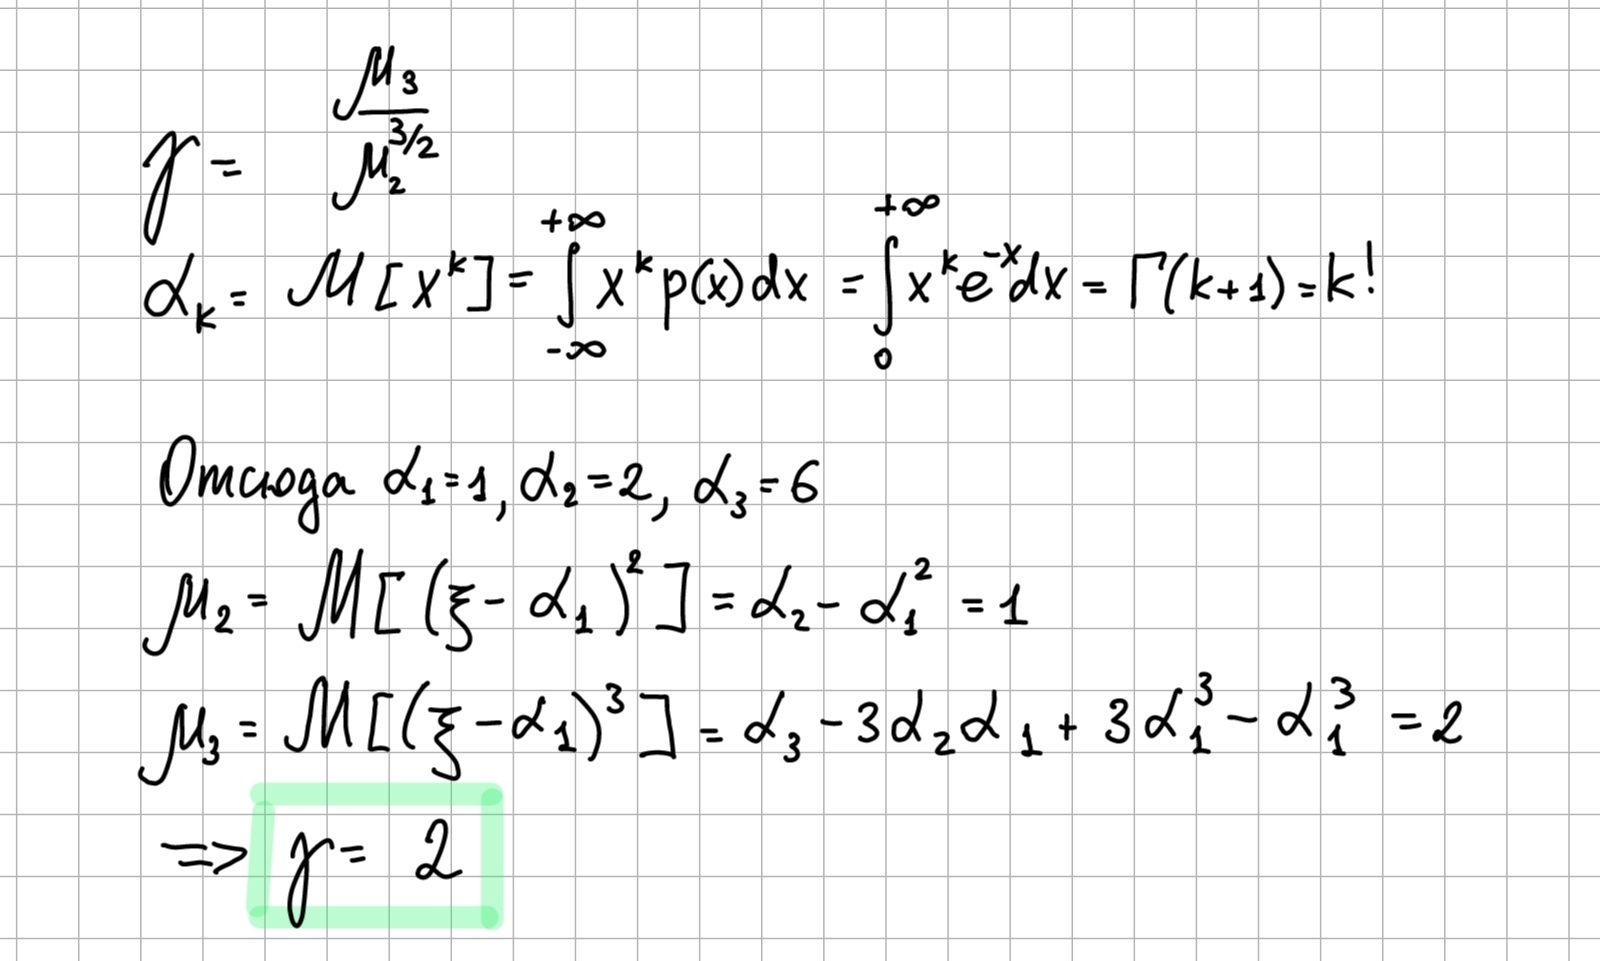

In [8]:
Image(filename="pics/t2p2.jpg", width = 950)

# b) Функции

### 1.Эмпирическая функция распределения

\begin{equation*}
\widetilde{F_{n}}(x) = 
 \begin{cases}
   0, &\text{ если $ x \leq x_{min} $}\\
   \frac{m(x)}{n}, &\text{ если $ x_k < x \leq x_{k + 1} $}\\
   1, &\text{ при $ x > x_{max} $}
 \end{cases}
\end{equation*}

m(x) - число элементов выборки меньше х;

n - объем выборки

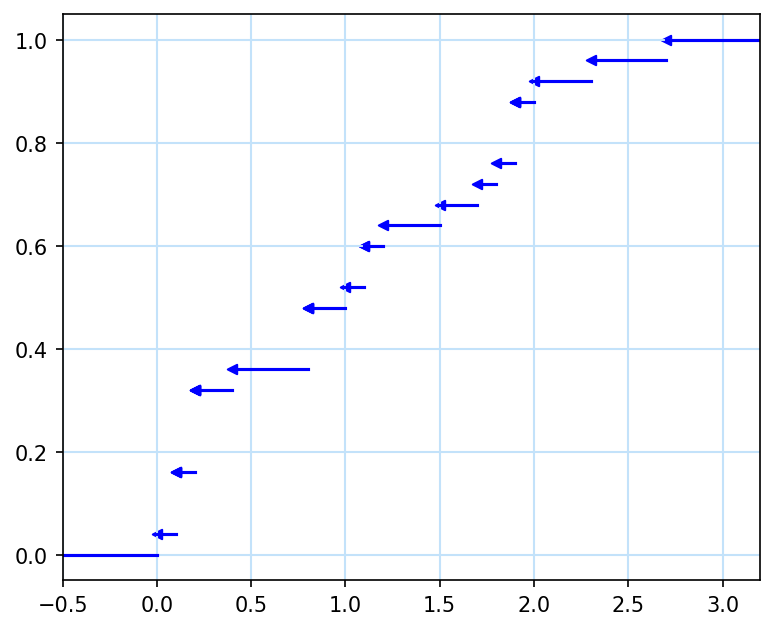

In [9]:
def empirical_distribution(x_k: List[float], x: float) -> float:
    if x < x_k[0]:
        return 0
    if x > x_k[-1]:
        return 1
    for i in range(len(x_k)):
        if x < x_k[i]:
            return i / len(x_k)
X = var_series
Y = [empirical_distribution(var_series, element) for element in X]

fig, ax = plt.subplots(figsize=(6, 5), dpi=150)
ax.grid(which='major', color = '#c3e2fa', linewidth = 1)       #для красоты
plt.xlim(-0.5, var_series[-1]+0.5)

for i in range(0,len(Y)-1):                                    #полуинтервалы
    plt.plot([X[i], X[i+1]],[Y[i], Y[i]], c="blue")
    plt.scatter(X[i], Y[i], color='blue', s=20, marker='<')
    
plt.plot([-1, var_series[0]],[0, 0], c="blue")                 #края
plt.plot([var_series[-1], var_series[-1]+1],[1, 1], c="blue")
plt.scatter(X[-1], 1, color='blue', s=20, marker='<')

plt.show()






### 2. Гистограмма

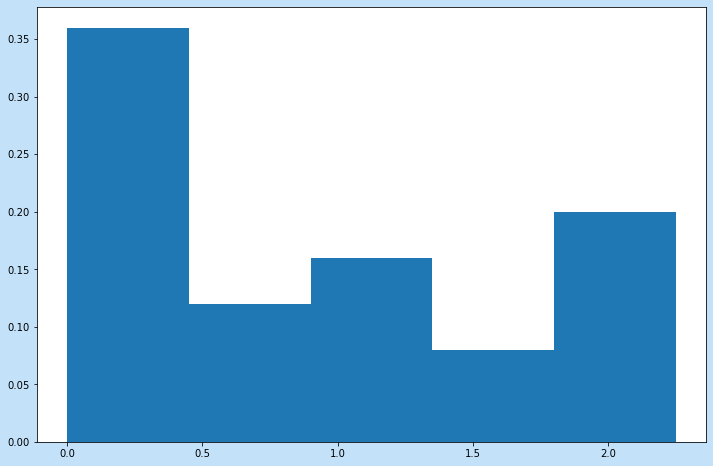

In [10]:
k = 6       # k = 1 + np.log(n) / np.log(2), но у нас n=25
delta_x = size / k    # сайз это размах

def count(start, end):  #считаем, сколько эл-тов выборки в диапазоне [start, end)
    c = 0
    for i in range(n):
        if start <= var_series[i] < end:
            c += 1
    return c

fig, ax = plt.subplots()
fig.set_facecolor("#c3e2fa")
fig.set_figwidth(12)
fig.set_figheight(8)
X_2 = list()
Y = list()
for i in range(1, k):
    X_2.append(((i-1)*delta_x + i*delta_x) / 2)
    Y.append(count((i-1)*delta_x, i*delta_x) / n)
plt.bar(X_2, Y, width = delta_x)
plt.show()

### 3. Диаграмма с усиками(boxplot)

<AxesSubplot:>

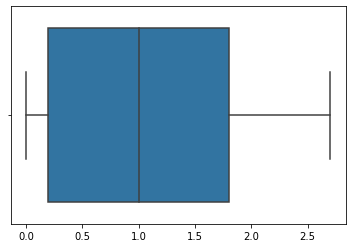

In [11]:
sb.boxplot(x = var_series, whis = 1.5) #whis - max length of the plot whiskers as proportion of the interquartile range

# c) Ядерная оценка плотности распределения

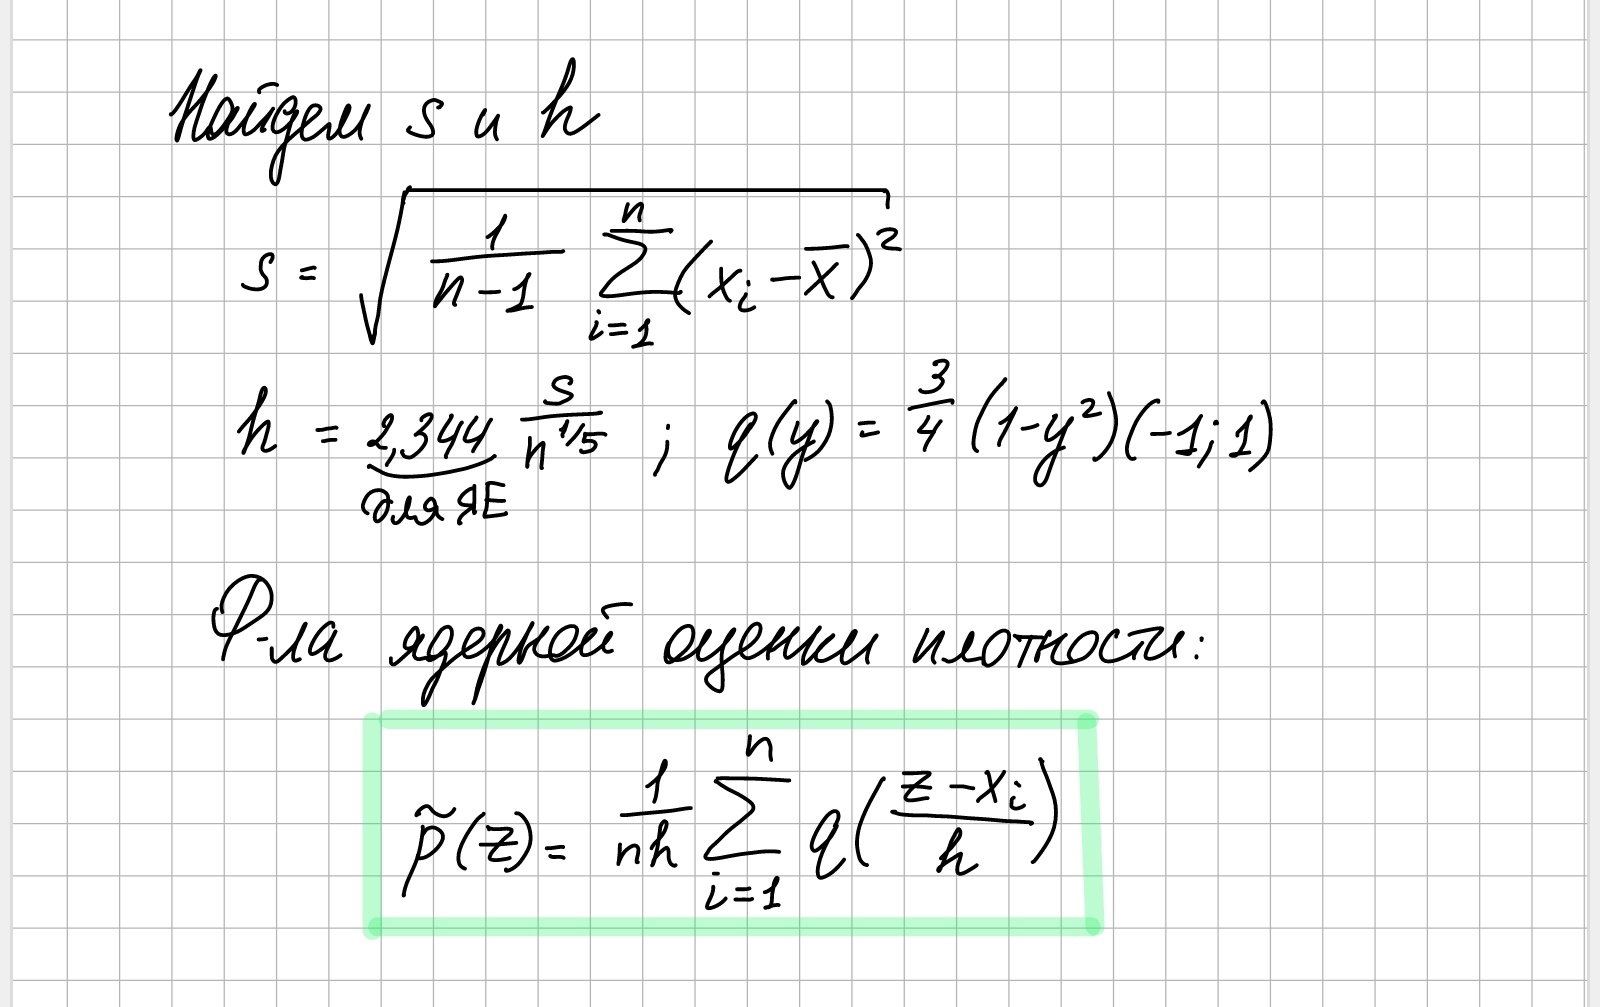

In [12]:
Image(filename="pics/t2p3.jpg", width = 950)

#### q(y) тут это ядро Епанечникова

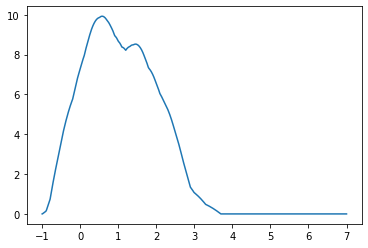

In [13]:
x_mean = sum(sample)/len(sample)
sum1 = 0
for i in range(0,n-1):
    sum1 += (sample[i] - x_mean)**2
    
s = (sum1/(n-1))**0.5
    
h = 2.344*s/(n**0.2)

elem_num = 500
q = np.array([])
p = [0.] * elem_num
p = np.array(p)
for i in range(n):
    x = np.linspace(-1., 7., elem_num)
    q = np.array([])
    for elem in x:
        if sample[i] - h <= elem and elem <= sample[i] + h:
            q = np.append(q, 3/4 * (1 - ((elem - sample[i])/h) ** 2))
        else:
            q = np.append(q, 0)
    for i in range(len(q)):
        p[i] = p[i] + q[i]
x = np.linspace(-1., 7., elem_num)
plt.plot(x, p)

## d) Плотность распределения среднего арифметического

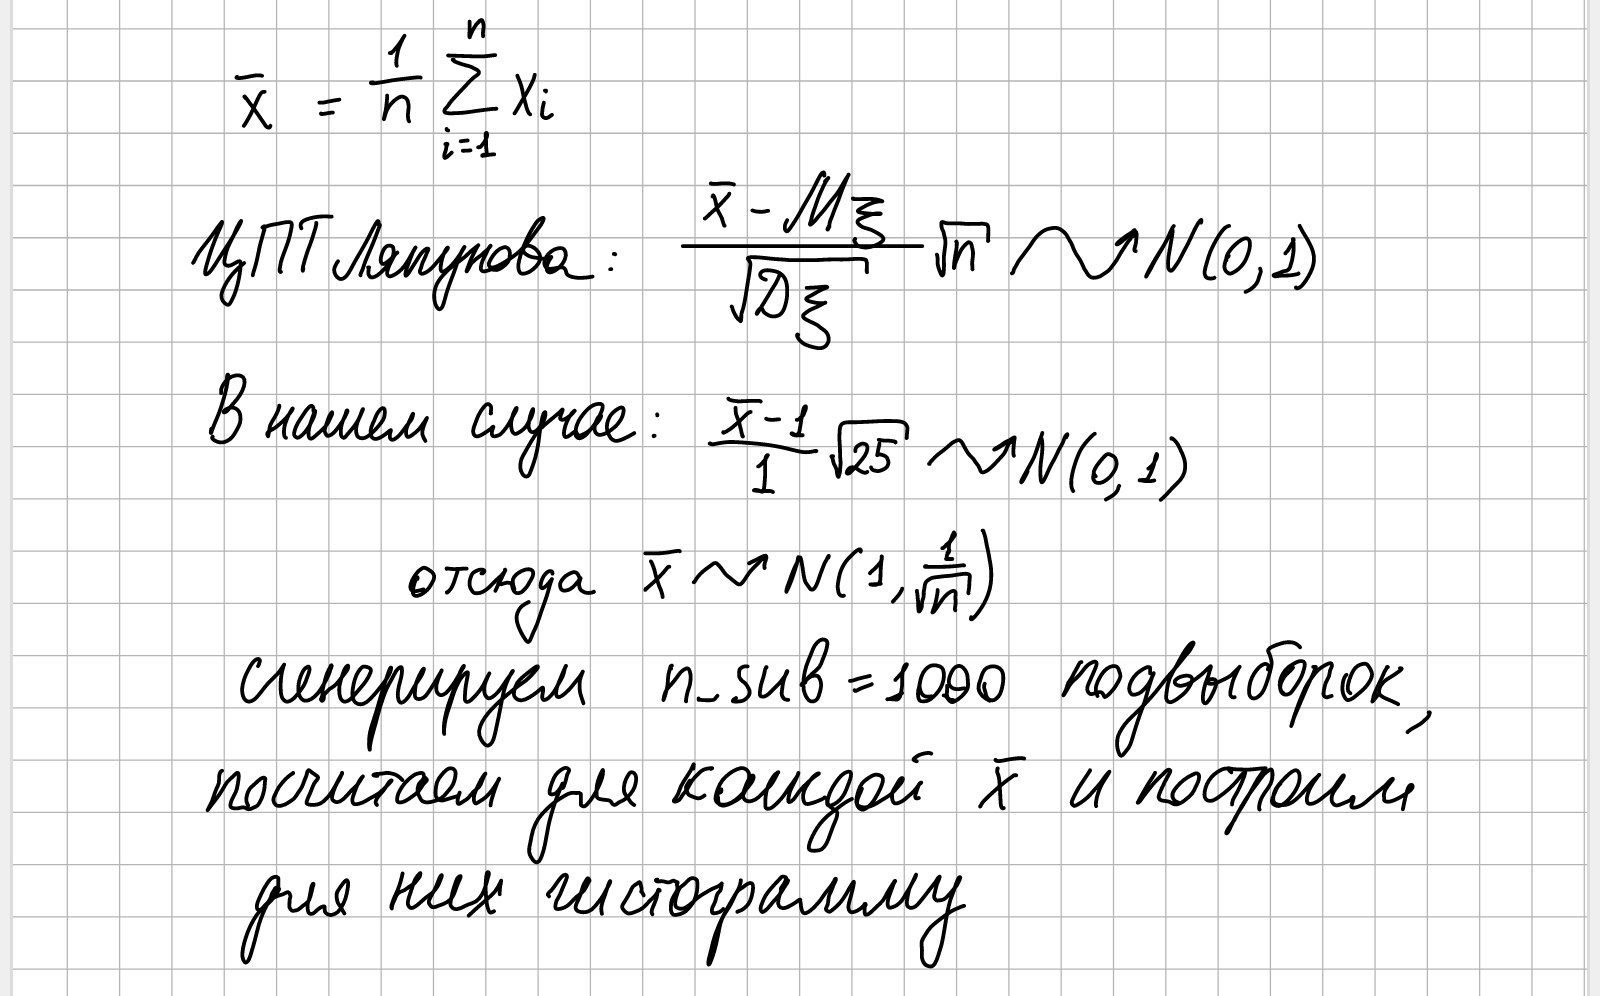

In [14]:
Image(filename="pics/t2p4.jpg", width = 950)

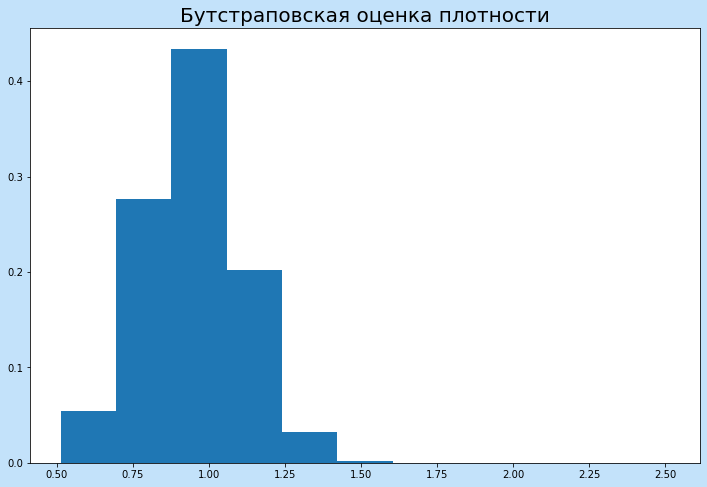

In [15]:
def subsample_mean(data):     #считаем среднее для случайных подвыборок
    bs_subsample = np.random.choice(data, len(data))
    return np.mean(bs_subsample)

n_sub = 1000
bs_replicates = np.empty(n_sub) 

for i in range(n_sub):
    bs_replicates[i] = subsample_mean(sample)

    
k = 1 + math.ceil(np.log(1000)/np.log(2))
 
delta_bs = math.ceil(max(bs_replicates) - min(bs_replicates)) / k
first = min(bs_replicates)
last = max(bs_replicates) 
count = []
for i in range(k):
    count.append(0)
x = []
for i in range(k):
    x.append(first + delta_bs * i)
for elem in bs_replicates:
    for i in range(len(count)):
        if first + delta_bs * i <= elem and first + delta_bs * (i + 1) >= elem:
            count[i] += 1 / n_sub



fig, ax = plt.subplots()
ax.set_title("Бутстраповская оценка плотности", fontdict = {'fontsize': 20})
fig.set_facecolor("#c3e2fa")
fig.set_figwidth(12)
fig.set_figheight(8)

plt.bar(x, count, width = delta_bs)
plt.show()

# e) Плотность распределения коэффициента ассиметрии

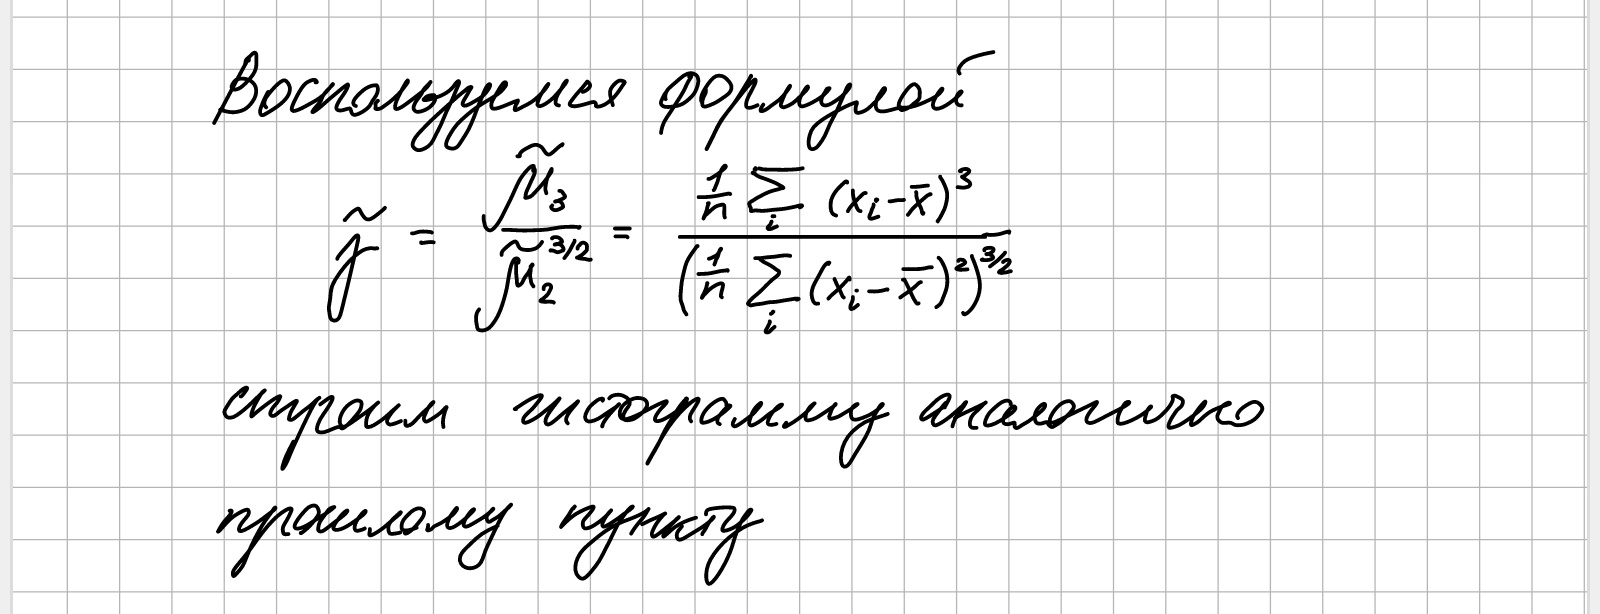

In [18]:
Image(filename="pics/t2p5.jpg", width = 950)

<BarContainer object of 11 artists>

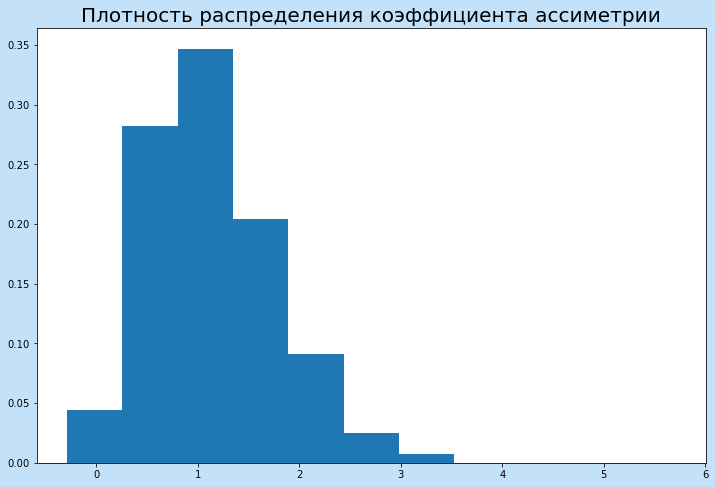

In [19]:
X = []
n = 25
for i in range(1000):
    xni = np.random.exponential(1, 25)
    x_mean = sum(xni) / 25
    gam1, gam2 = 0,0
    for i in range(25):
        gam1 += (xni[i] - x_mean) ** 3
    gam1 /= 25
    for i in range(25):
        gam2 += (xni[i] - x_mean) ** 2
    gam2 = (gam2 / 25) ** (3/2)
    X.append(gam1/ gam2)

k = 1 + math.ceil(np.log(1000)/np.log(2))
 
var_new = math.ceil(5 - min(X)) / k
first = min(X)
last = max(X) 
count = []
for i in range(k):
    count.append(0)
x = []
for i in range(k):
    x.append(first + var_new * i)
for elem in X:
    for i in range(len(count)):
        if first + var_new * i <= elem and first + var_new * (i + 1) >= elem:
            count[i] += 1 / 1000
            break
            
fig, ax = plt.subplots()
ax.set_title("Плотность распределения коэффициента ассиметрии", fontdict = {'fontsize': 20})
fig.set_facecolor("#c3e2fa")
fig.set_figwidth(12)
fig.set_figheight(8)
plt.bar(x, count, width = var_new)

#### Замечание: так как мы знаем, что γ = 2, можем сделать вывод, что оценка смещена

# f) Плотность совместного распределения i-ого и j-ого элементов вариационного ряда

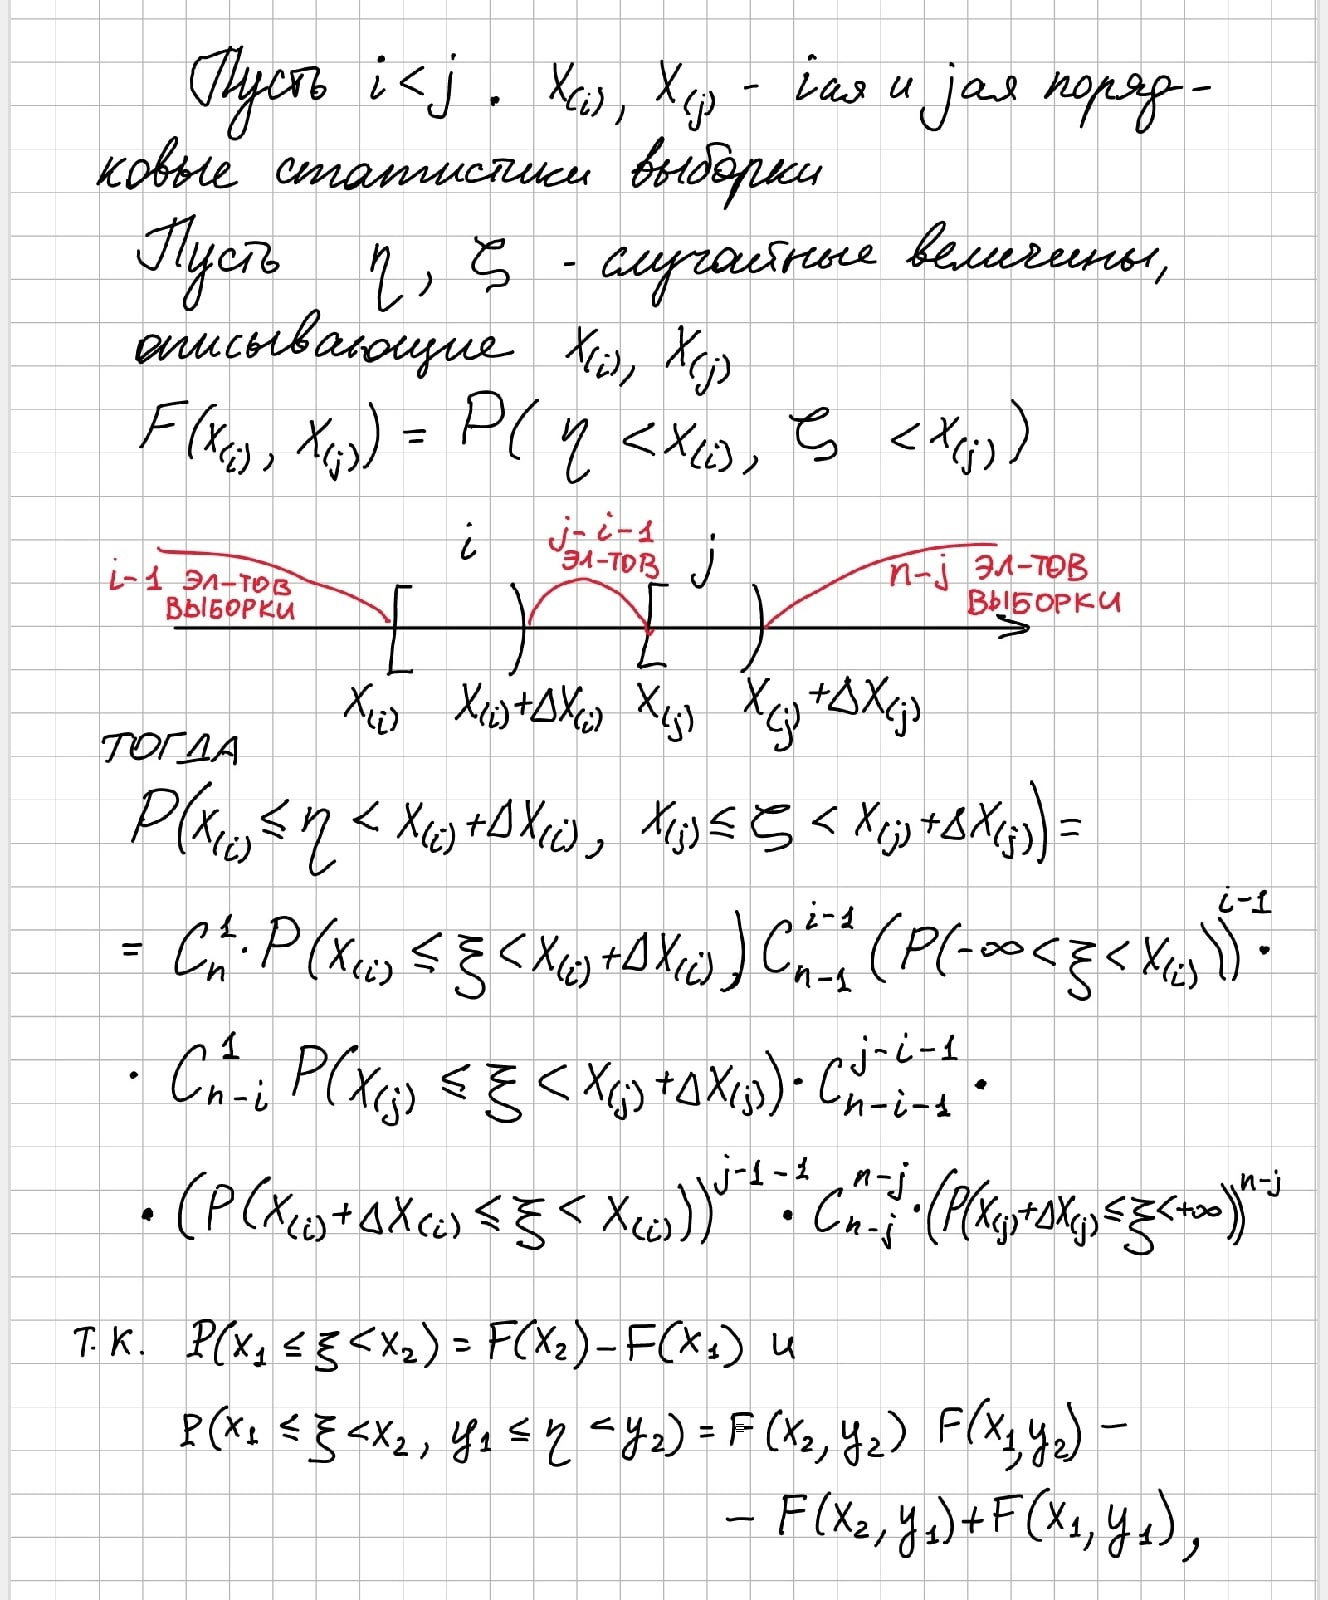

In [20]:
Image(filename="pics/t2p6.jpg", width = 950)

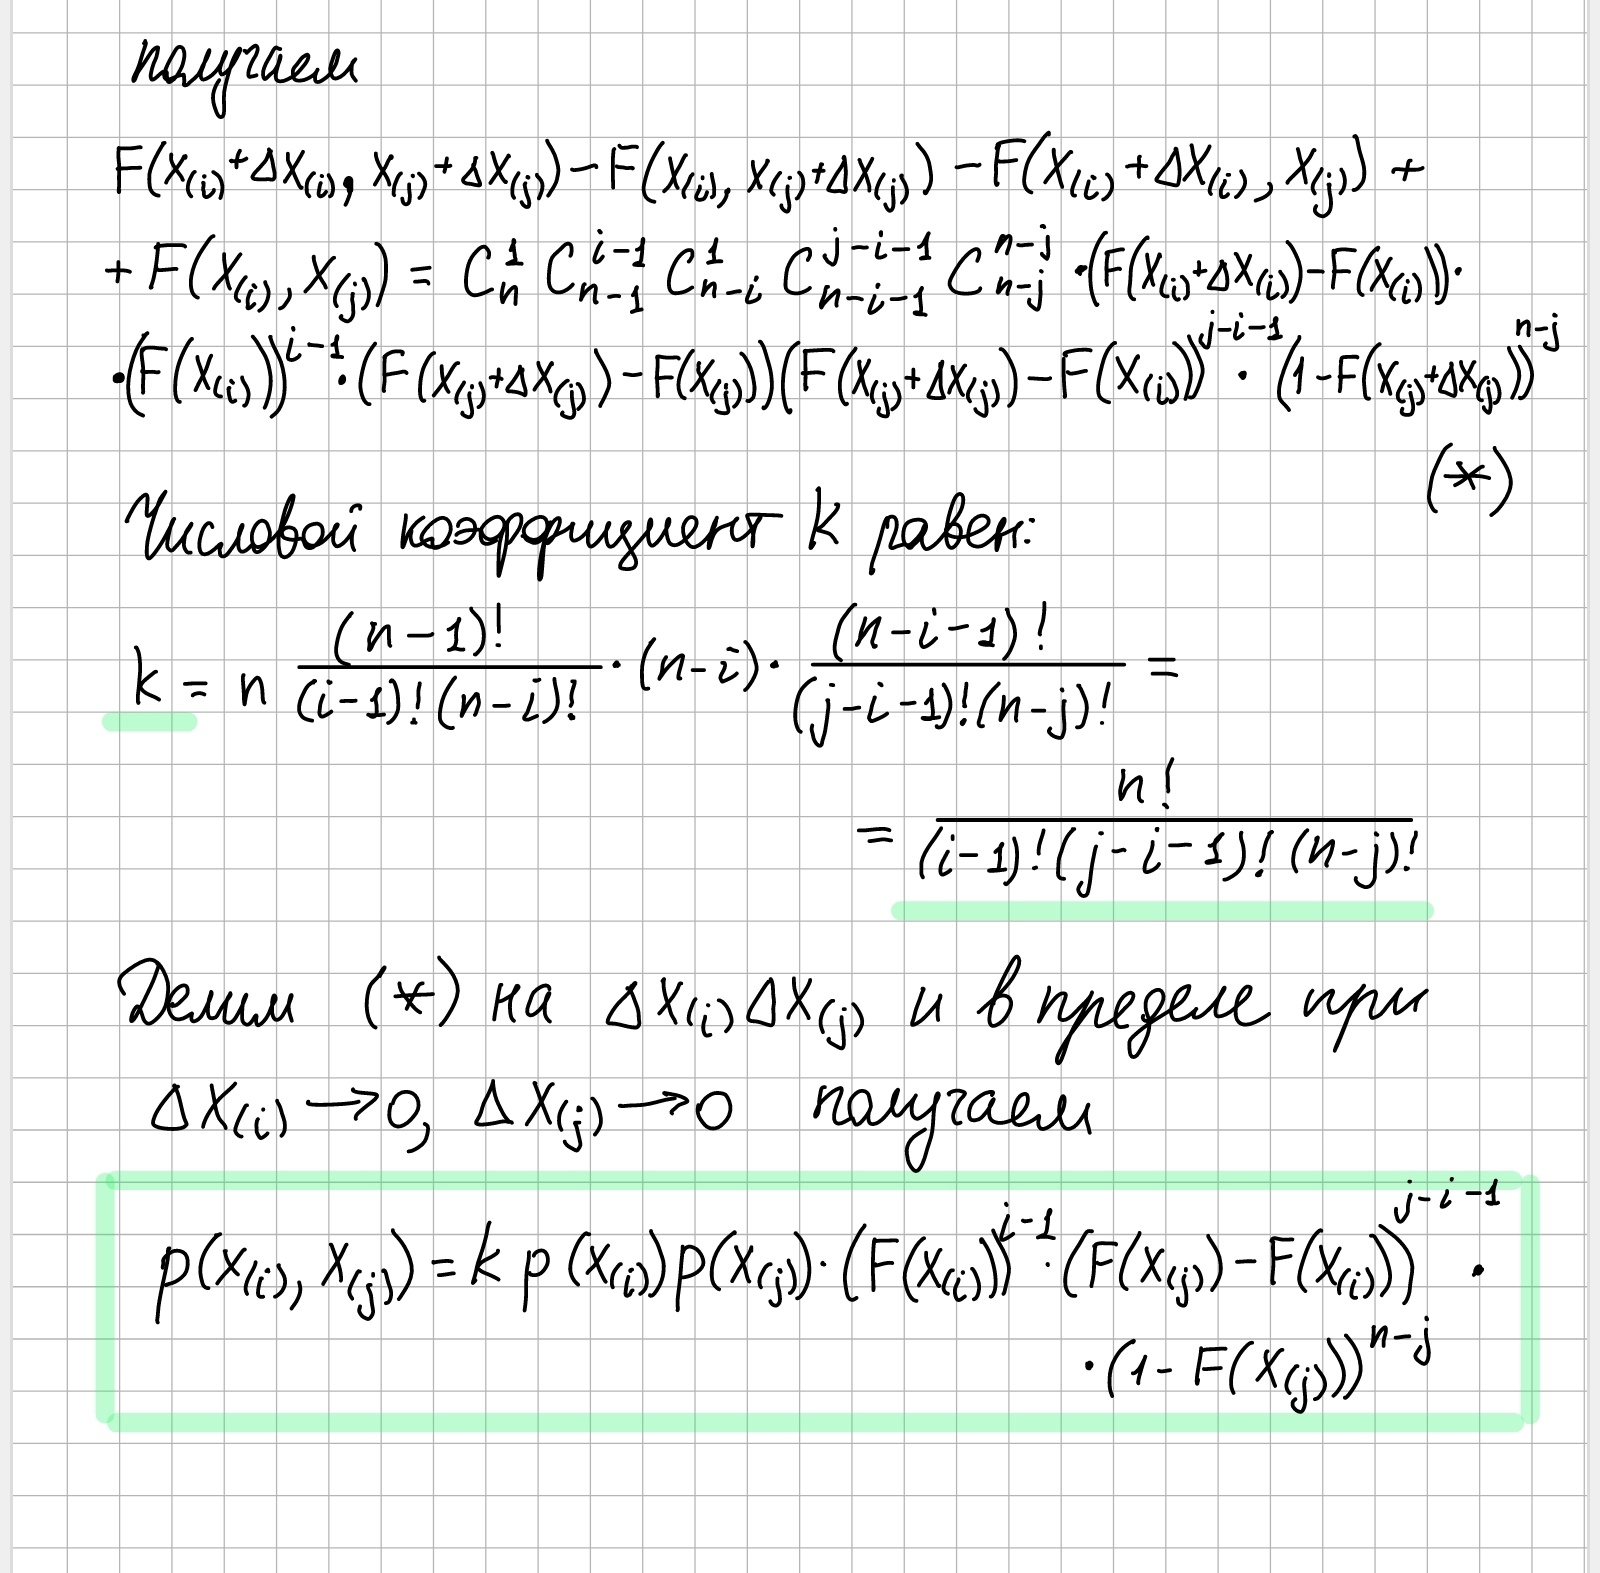

In [21]:
Image(filename="pics/t2p7.jpg", width = 950)